   # Loan Application Status Prediction

Project Description:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


 # Decision Tree Classifier
 
 
 # Step 1: importing necessary libraries and load the data

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
loan=pd.read_csv(r'C:\Users\HP\Desktop\DSData-master\loan_prediction.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From the given dataset there are 614 rows and 13 columns are presented. Here Loan Status is my target variable and it is binary classification model.

These are variables present in the given datset:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.



#  Step 2: Exploratory Data Analysis (EDA) 

In [3]:
#finding th shape
loan.shape

(614, 13)

In [4]:
#checking the duplicates values
loan.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

yes, there are zero duplicate values.

In [5]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#checking null values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

here it contains some null values so, have to fill those null values

In [7]:
#finding the unique values
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
loan=loan.set_index('Loan_ID')
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [9]:
categ=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

To fill those null values first i am spliting the categorical columns for easy calculation.

In [10]:
# filling above categorical column null values with mode
for p in categ:
    loan[p].fillna(loan[p].mode()[0], inplace=True)

In [11]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)

In [12]:
#checking null values
loan.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Yes, sucessfully there is no null values.

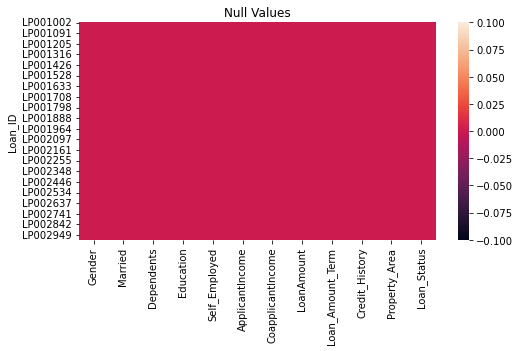

In [13]:
#Visualizing null values
plt.figure(figsize=[8,4])
sns.heatmap(loan.isna())
plt.title("Null Values")
plt.show()


In [14]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [15]:
#Getting the normal summary and statistical information of the data
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


It has 4 float64 , 1 int64 and 7 object types data and zero null values.

In [16]:
#checking datatypes
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
#seperating the categorical column and numerical column
categorical_col=[]
for i in loan.dtypes.index:
    if loan.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical column: ", categorical_col)
print("\n")

numerical_col=[]
for i in loan.dtypes.index:
    if loan.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical column: ", numerical_col)
print("\n")

categorical column:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


numerical column:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




In [18]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


As per my observation, the value count is same in all the columns which indicates no missing data.
The difference between the mean and standard devaition of each is not very less.
The mean value is less than std value for Applicantincome and coapplicantincome column.
The mean value is more than 50% of median in all columns so, there will skewness problem.
Also we can have min, 75%, max values.

# Step 3: Visualization

# Univariate Analysis: 

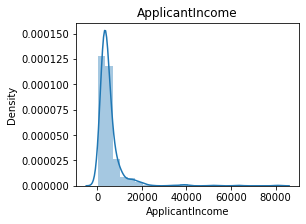

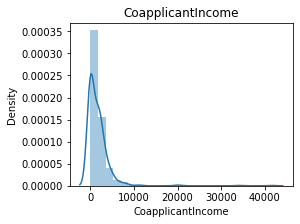

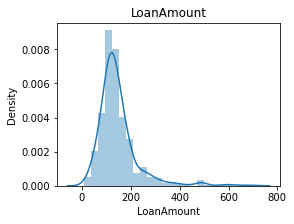

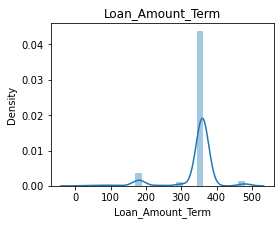

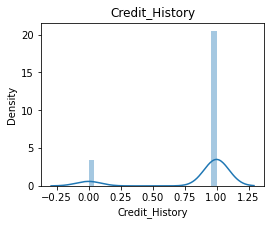

In [19]:
#distribution plot for numerical columns
for k in loan[numerical_col]:              
    plt.figure(figsize = (4, 3))
    sns.distplot(loan[k], bins = 24)
    plt.title(k)
    plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

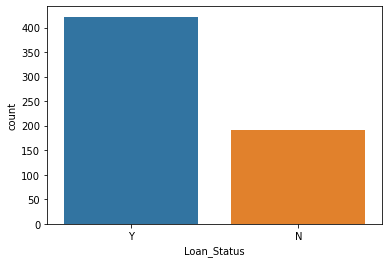

In [20]:
sns.countplot(loan.Loan_Status)

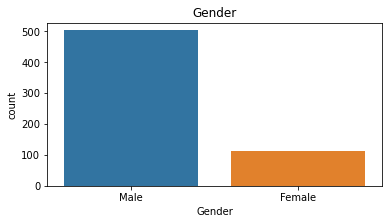

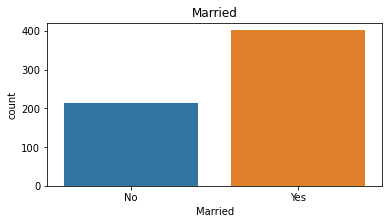

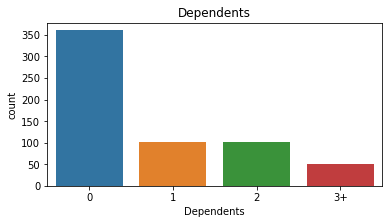

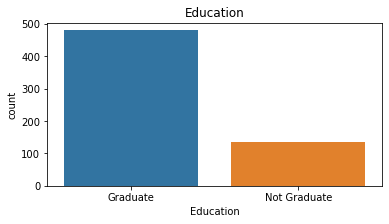

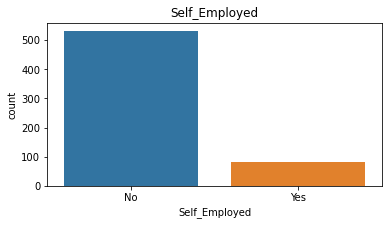

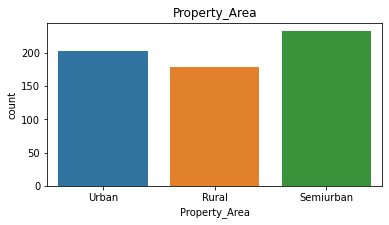

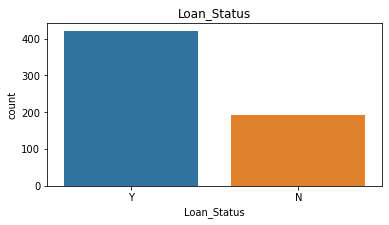

In [21]:
#distribution plot for numerical columns
for k in loan[categorical_col]:              
    plt.figure(figsize = (6, 3))
    sns.countplot(loan[k])
    plt.title(k)
    plt.show()

# Bivariate Analysis

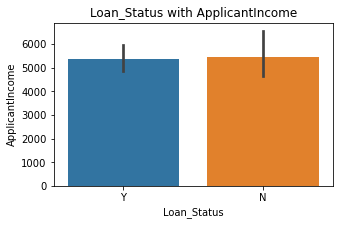

In [22]:
plt.figure(figsize=(5,3))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=loan)
plt.title("Loan_Status with ApplicantIncome")
plt.show()


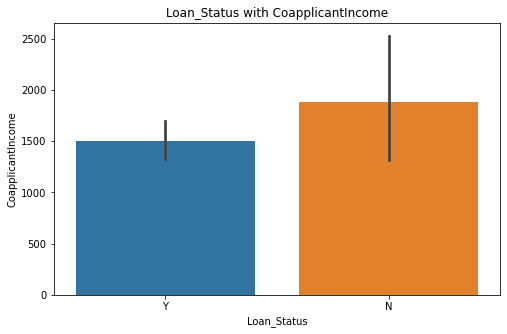

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=loan)
plt.title("Loan_Status with CoapplicantIncome")
plt.show()

# Multivariate analysis

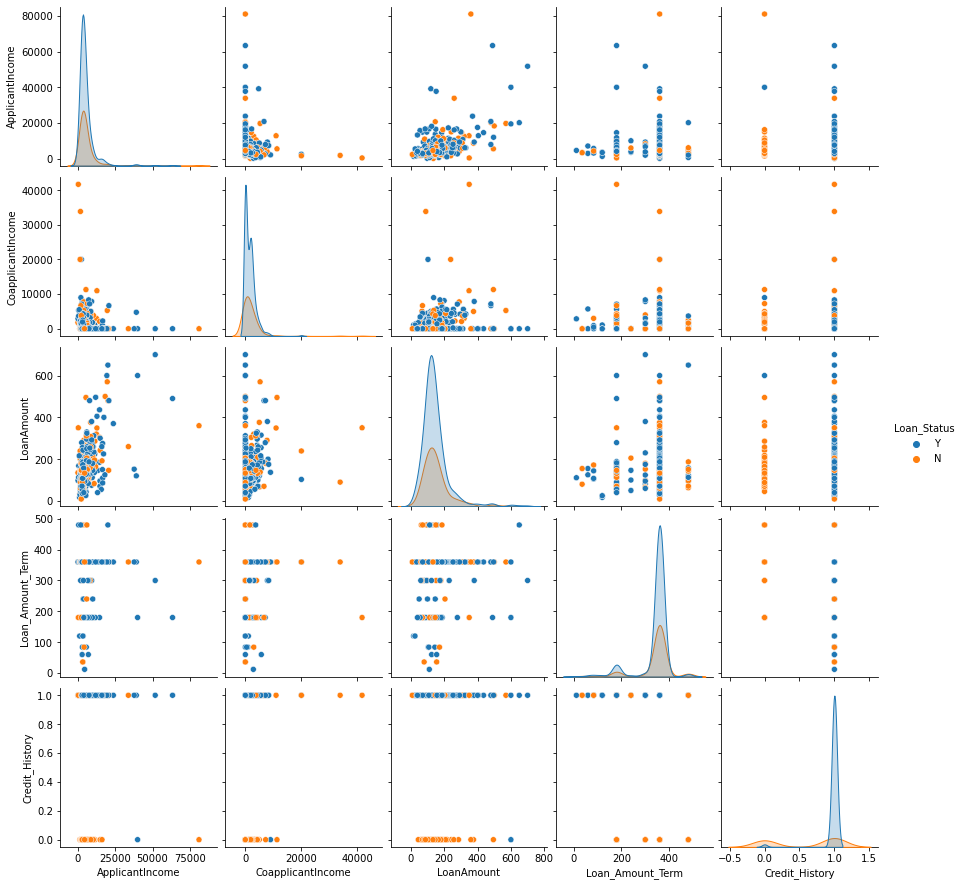

In [24]:
#pair ploting for price
sns.pairplot(loan,hue='Loan_Status')

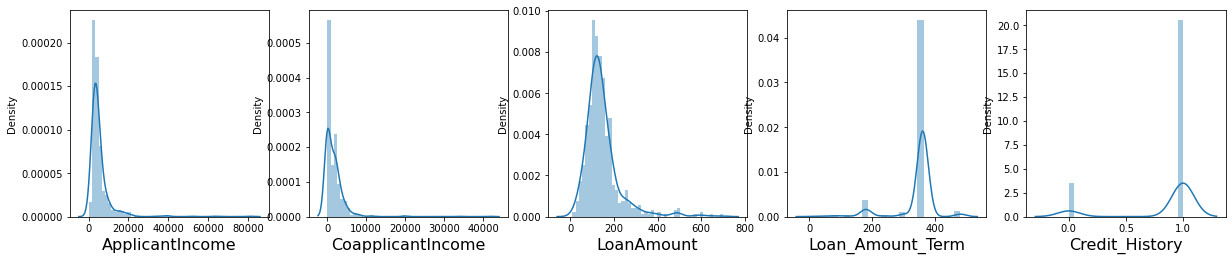

In [25]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in numerical_col:
    if plotnumber<=13:
    
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(loan[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in loan.columns:
    loan[column] = labelencoder.fit_transform(loan[column])

In [27]:
loan.dtypes

Gender               int32
Married              int32
Dependents           int32
Education            int32
Self_Employed        int32
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int32
Loan_Status          int32
dtype: object

<AxesSubplot:>

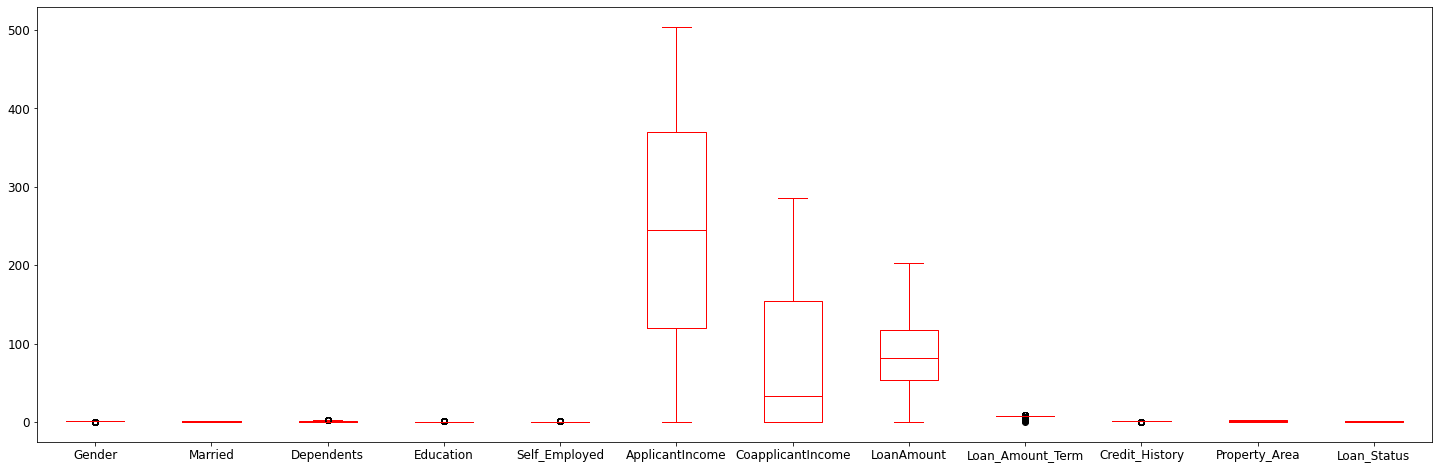

In [28]:
loan.plot(kind='box',fontsize=12,figsize=(25,8),color='r')

In [29]:
# removing outliers using statsmodel
from scipy import stats
from scipy.stats import zscore
data1=loan.drop('Loan_Status', axis=1)
z=np.abs(zscore(data1))

threshold=3
np.where(z>3)
data=loan[(z<3).all(axis=1)]

In [30]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,376,0,100,8,1,2,1
LP001003,1,1,1,0,0,306,60,81,8,1,0,0
LP001005,1,1,0,0,1,139,0,26,8,1,2,1
LP001006,1,1,0,1,0,90,160,73,8,1,2,1
LP001008,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,125,0,29,8,1,0,1
LP002979,1,1,3,0,0,275,0,7,5,1,0,1
LP002983,1,1,1,0,0,431,3,163,8,1,2,1


In [31]:
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,0.472343,1.372089,0.737806,0.528362,0.392601,0.898633,0.852357,0.269107,0.299776,0.411733,1.223298
LP001003,0.472343,0.728816,0.253470,0.528362,0.392601,0.410559,0.204048,0.147259,0.299776,0.411733,1.318513
LP001005,0.472343,0.728816,0.737806,0.528362,2.547117,0.753846,0.852357,1.352528,0.299776,0.411733,1.223298
LP001006,0.472343,0.728816,0.737806,1.892641,0.392601,1.095498,0.876466,0.322571,0.299776,0.411733,1.223298
LP001008,0.472343,1.372089,0.737806,0.528362,0.392601,0.933495,0.852357,0.137623,0.299776,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,2.117107,1.372089,0.737806,0.528362,0.392601,0.851461,0.852357,1.286786,0.299776,0.411733,1.318513
LP002979,0.472343,0.728816,2.236021,0.528362,0.392601,0.194412,0.852357,1.768894,2.407023,0.411733,1.318513
LP002983,0.472343,0.728816,0.253470,0.528362,0.392601,1.282119,0.819941,1.649687,0.299776,0.411733,1.223298


In [32]:
loss_data=(614-602)/602*100
loss_data

1.9933554817275747

In [33]:
from scipy import stats 
IQR = stats.iqr(loan) 
IQR

8.0

In [34]:
Q1 = loan.quantile(0.25)
Q3 = loan.quantile(0.75)
loan_out = loan[~((loan < (Q1 - 1.5 * IQR)) |(loan> (Q3 + 1.5 * IQR))).any(axis=1)]
print(loan_out.shape)

(199, 12)


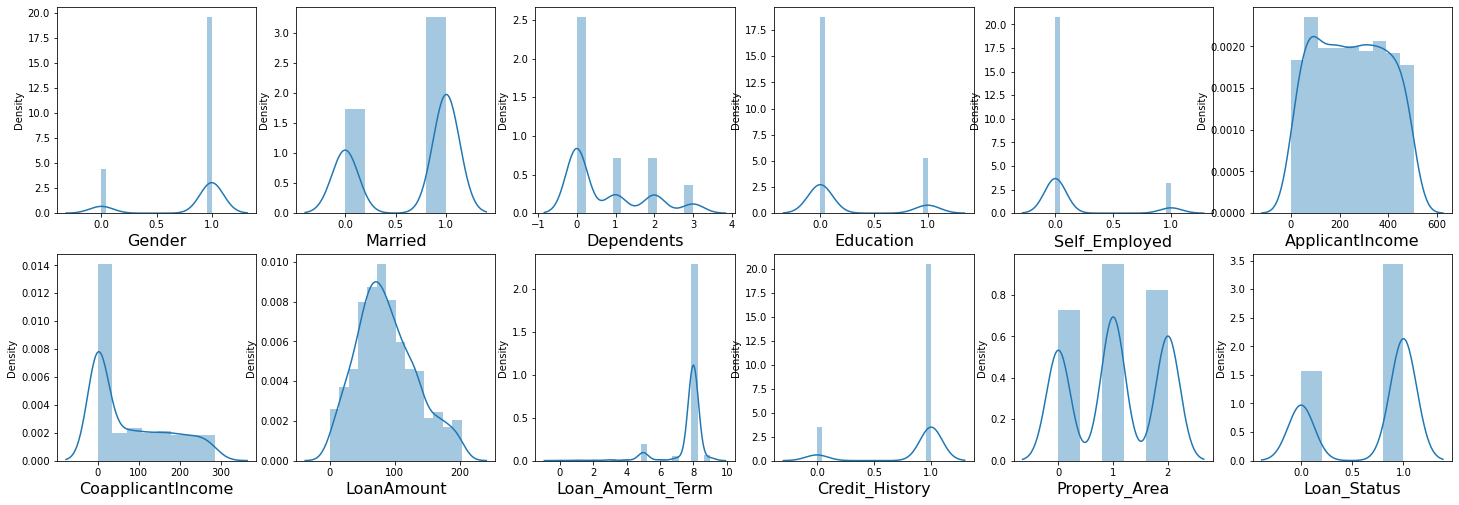

In [35]:
plt.figure(figsize=(25,22),facecolor="white")
plotnumber=1
for columns in loan:
    if plotnumber<=13:
    
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(loan[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

In [36]:
data.skew()

Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome    0.772613
LoanAmount           0.471894
Loan_Amount_Term    -2.771730
Credit_History      -1.989282
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

In [37]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,376,0,100,8,1,2,1
LP001003,1,1,1,0,0,306,60,81,8,1,0,0
LP001005,1,1,0,0,1,139,0,26,8,1,2,1
LP001006,1,1,0,1,0,90,160,73,8,1,2,1
LP001008,1,0,0,0,0,381,0,94,8,1,2,1


In [38]:

#corelation b/n features and target variable.
corr=data.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.368486,0.176118,0.041013,-0.007190,0.073710,0.179860,0.158896,-0.089852,0.008932,-0.029178,0.013570
Married,0.368486,1.000000,0.330451,0.020972,-0.005922,0.007245,0.213575,0.189812,-0.118241,0.010827,0.004181,0.085587
Dependents,0.176118,0.330451,1.000000,0.056553,0.046854,0.136904,-0.057833,0.163986,-0.105992,-0.042752,-0.003732,0.006068
Education,0.041013,0.020972,0.056553,1.000000,-0.014201,-0.198063,-0.045837,-0.169241,-0.092725,-0.075231,-0.068258,-0.085635
Self_Employed,-0.007190,-0.005922,0.046854,-0.014201,1.000000,0.194238,-0.026134,0.126004,-0.005318,-0.004444,-0.028891,-0.012696
ApplicantIncome,0.073710,0.007245,0.136904,-0.198063,0.194238,1.000000,-0.253251,0.526745,-0.038021,0.039575,-0.060833,-0.002494
CoapplicantIncome,0.179860,0.213575,-0.057833,-0.045837,-0.026134,-0.253251,1.000000,0.258445,-0.038897,-0.004657,-0.085403,0.009370
LoanAmount,0.158896,0.189812,0.163986,-0.169241,0.126004,0.526745,0.258445,1.000000,0.020885,0.004185,-0.078437,-0.042732
Loan_Amount_Term,-0.089852,-0.118241,-0.105992,-0.092725,-0.005318,-0.038021,-0.038897,0.020885,1.000000,0.048856,-0.077896,-0.001415
Credit_History,0.008932,0.010827,-0.042752,-0.075231,-0.004444,0.039575,-0.004657,0.004185,0.048856,1.000000,-0.000257,0.545127


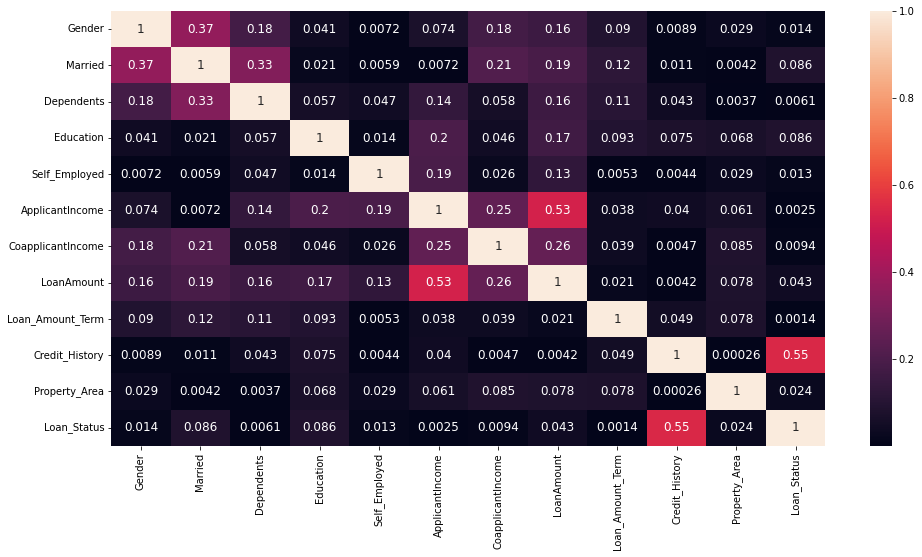

In [39]:
df_corr=data.corr().abs()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

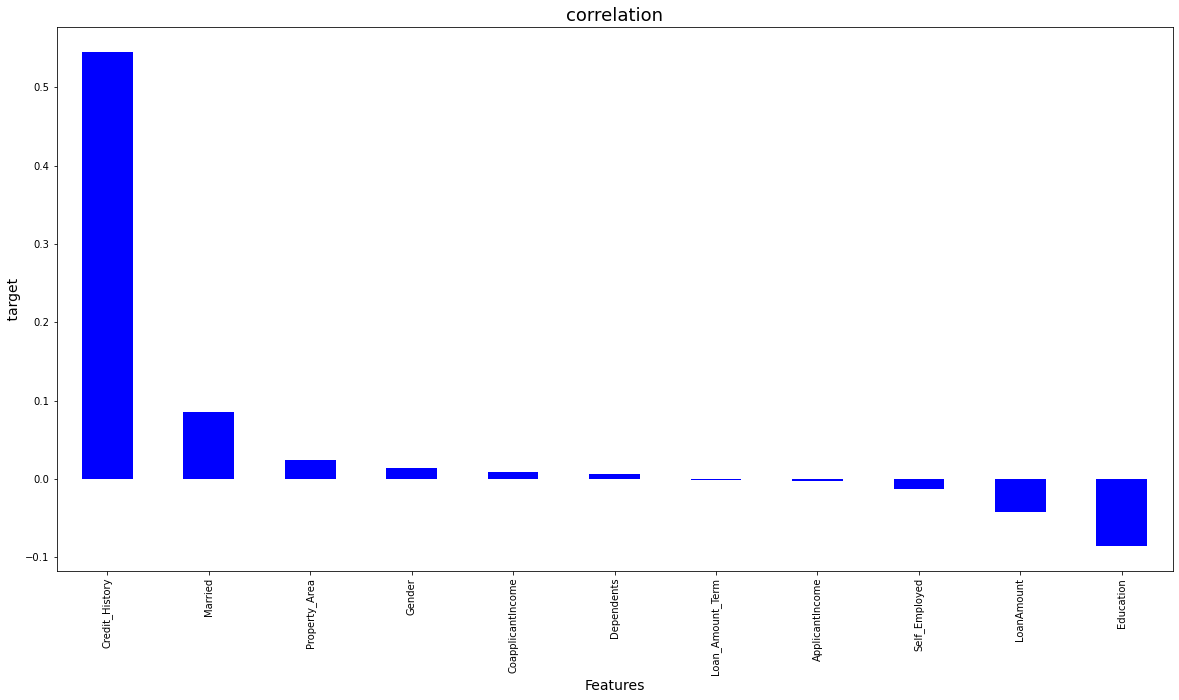

In [40]:
plt.figure(figsize=(20,10))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel(' target ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [41]:
data=data.drop('ApplicantIncome', axis=1)

In [42]:
#fixing features and label

a=data.drop('Loan_Status', axis=1)
b=data['Loan_Status']

In [43]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472840,-1.371270,-0.733106,-0.527382,-0.388654,-0.857426,0.258071,0.278328,0.416520,1.227651
1,0.472840,0.729251,0.258646,-0.527382,-0.388654,-0.208522,-0.159029,0.278328,0.416520,-1.312026
2,0.472840,0.729251,-0.733106,-0.527382,2.572985,-0.857426,-1.366421,0.278328,0.416520,1.227651
3,0.472840,0.729251,-0.733106,1.896159,-0.388654,0.872984,-0.334649,0.278328,0.416520,1.227651
4,0.472840,-1.371270,-0.733106,-0.527382,-0.388654,-0.857426,0.126355,0.278328,0.416520,1.227651
...,...,...,...,...,...,...,...,...,...,...
597,-2.114882,-1.371270,-0.733106,-0.527382,-0.388654,-0.857426,-1.300564,0.278328,0.416520,-1.312026
598,0.472840,0.729251,2.242150,-0.527382,-0.388654,-0.857426,-1.783521,-3.364134,0.416520,-1.312026
599,0.472840,0.729251,0.258646,-0.527382,-0.388654,-0.824981,1.641084,0.278328,0.416520,1.227651
600,0.472840,0.729251,1.250398,-0.527382,-0.388654,-0.857426,0.982506,0.278328,0.416520,1.227651


In [44]:
x_scaled

array([[ 0.47283955, -1.3712705 , -0.73310572, ...,  0.27832765,
         0.41652044,  1.22765141],
       [ 0.47283955,  0.72925072,  0.25864629, ...,  0.27832765,
         0.41652044, -1.31202608],
       [ 0.47283955,  0.72925072, -0.73310572, ...,  0.27832765,
         0.41652044,  1.22765141],
       ...,
       [ 0.47283955,  0.72925072,  0.25864629, ...,  0.27832765,
         0.41652044,  1.22765141],
       [ 0.47283955,  0.72925072,  1.25039829, ...,  0.27832765,
         0.41652044,  1.22765141],
       [-2.11488233, -1.3712705 , -0.73310572, ...,  0.27832765,
        -2.40084255, -0.04218733]])

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.190063,Gender
1,1.328805,Married
2,1.190707,Dependents
3,1.061029,Education
4,1.022219,Self_Employed
5,1.160660,CoapplicantIncome
6,1.189462,LoanAmount
7,1.041723,Loan_Amount_Term
8,1.010148,Credit_History
9,1.027578,Property_Area


In [46]:
b.value_counts()


1    413
0    189
Name: Loan_Status, dtype: int64

In [47]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b=sampling.fit_resample(a,b)

In [48]:
b.value_counts()

1    413
0    413
Name: Loan_Status, dtype: int64

# step4: Modelling

In [49]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled

array([[ 0.48370946, -1.37711328, -0.74101942, ...,  0.25634179,
         0.5236421 ,  1.27294815],
       [ 0.48370946,  0.74265066,  0.26193743, ...,  0.25634179,
         0.5236421 , -1.28904479],
       [ 0.48370946,  0.74265066, -0.74101942, ...,  0.25634179,
         0.5236421 ,  1.27294815],
       ...,
       [ 0.48370946,  0.74265066,  2.26785112, ..., -0.70038998,
        -1.93397531, -0.00804832],
       [ 0.48370946,  0.10727229, -0.74101942, ...,  0.25634179,
         0.5236421 , -1.28904479],
       [ 0.48370946,  0.74265066,  1.07587736, ...,  0.25634179,
         0.5236421 , -1.28904479]])

In [50]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [51]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.22, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.8846153846153846 at random state is 46


In [71]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.22, random_state=46)

In [72]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [73]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 83.516484%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        88
           1       0.84      0.84      0.84        94

    accuracy                           0.84       182
   macro avg       0.83      0.83      0.83       182
weighted avg       0.84      0.84      0.84       182



array([[73, 15],
       [15, 79]], dtype=int64)

In [74]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)



================ Test Result ================== 
Accuracy Score: 77.472527%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77        88
           1       0.78      0.79      0.78        94

    accuracy                           0.77       182
   macro avg       0.77      0.77      0.77       182
weighted avg       0.77      0.77      0.77       182



array([[67, 21],
       [20, 74]], dtype=int64)

In [75]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 87.362637%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87        88
           1       0.86      0.90      0.88        94

    accuracy                           0.87       182
   macro avg       0.88      0.87      0.87       182
weighted avg       0.87      0.87      0.87       182



array([[74, 14],
       [ 9, 85]], dtype=int64)

In [76]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 82.417582%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        88
           1       0.79      0.90      0.84        94

    accuracy                           0.82       182
   macro avg       0.83      0.82      0.82       182
weighted avg       0.83      0.82      0.82       182



array([[65, 23],
       [ 9, 85]], dtype=int64)

In [77]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 82.417582%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        88
           1       0.84      0.81      0.83        94

    accuracy                           0.82       182
   macro avg       0.82      0.82      0.82       182
weighted avg       0.83      0.82      0.82       182



array([[74, 14],
       [18, 76]], dtype=int64)

In [78]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 85.714286%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        88
           1       0.89      0.83      0.86        94

    accuracy                           0.86       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.86      0.86      0.86       182



array([[78, 10],
       [16, 78]], dtype=int64)

# Crossvalidation

In [79]:
score=cross_val_score(dc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.70481928 0.72727273 0.78181818 0.81818182 0.82424242]
0.7712668857247171
Difference between Accuracy score and cross validation score is-  -0.23829985275768417


In [80]:
score=cross_val_score(kn, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.72891566 0.73939394 0.77575758 0.74545455 0.76969697]
0.7518437385907266
Difference between Accuracy score and cross validation score is-  -0.21887670562369366


In [81]:
score=cross_val_score(GB, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.69277108 0.76363636 0.83030303 0.76363636 0.82424242]
0.7749178532311063
Difference between Accuracy score and cross validation score is-  -0.24195082026407333


In [82]:
score=cross_val_score(Etc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.78313253 0.81818182 0.86666667 0.85454545 0.87272727]
0.8390507484483388
Difference between Accuracy score and cross validation score is-  -0.30608371548130586


In [83]:
score=cross_val_score(bag, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.74096386 0.74545455 0.82424242 0.83030303 0.80606061]
0.7894048922964585
Difference between Accuracy score and cross validation score is-  -0.25643785932942553


In [84]:
score=cross_val_score(rfc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.77710843 0.78181818 0.84242424 0.82424242 0.87272727]
0.8196641109894122
Difference between Accuracy score and cross validation score is-  -0.2866970780223792


As per the crossvalidation decision tree classifier model has least value so i am chosing that model.

# Step 5: Hyperparameter tuning

In [85]:
#import the Grid search CV
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(20,40)
}

In [86]:
grid_search=GridSearchCV(estimator=dc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [87]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 23, 'max_leaf_nodes': 32, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [169]:
final_model=DecisionTreeClassifier( max_depth= 117, max_leaf_nodes=129, min_samples_leaf= 1, min_samples_split=2)
final_model.fit(x_train,y_train)
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 86.263736%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        88
           1       0.88      0.85      0.86        94

    accuracy                           0.86       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.86      0.86      0.86       182



# ROC-Curve

In [170]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

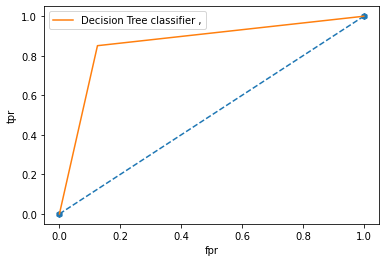

Auc Score is : 
 86.3031914893617


In [181]:
y_pred=final_model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'h--')
plt.plot(fpr,tpr, label="Decision Tree classifier ," %roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()
auc_score=roc_auc_score(y_test, final_model.predict(x_test))
print('Auc Score is :','\n', auc_score*100)

# step6: Save the model

In [183]:
#saving my model
import pickle

filename='Loan Application prediction'
pickle.dump(dc, open(filename,'wb'))


In [184]:
import pickle
loaded_model=pickle.load(open('Loan Application prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

83.51648351648352


In [185]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
original,1,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,1,1,0,0,1
predicted,1,0,1,1,1,0,0,1,0,1,...,0,1,0,1,1,1,1,0,0,1


Finally, Accuracy_score=83.51% and AUC score is 86.30%